The primary objective of this project is to showcase my skills in data preprocessing and cleaning by addressing the challenges presented in a real-world dataset. The project focuses on preparing the dataset for analysis and modeling, highlighting techniques that enhance data quality, reliability, and suitability for predictive modeling.

The key goals of this project are: 
* Thoroughly assess the dataset for missing values, outliers, and inconsistencies.
* Implement effective strategies to handle missing data, including imputation methods.
* Identify and address outliers that could affect the reliability of analysis.
* Perform data transformation and scaling to ensure features are suitable for modeling.
* Utilize feature engineering techniques to create new variables that capture important information.
* Present visualizations that illustrate the impact of preprocessing steps on data distribution and quality.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

### Load and explore the Dataset
The dataset has been acquired from the following kaggle competition
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
# Separate features and target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [4]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [6]:
# Print the features
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Print the datatypes
X.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [8]:
# Print the count of missing values in each column of the dataset
X.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

### Cleaning Data

#### Dropping columns

* Id: This column is an identifier and doesn't contribute to the modeling task.
* Utilities: This column has almost the same value for all rows, so it might not provide useful information.
* Street and Alley: These columns have imbalanced values and might not significantly impact the target.
* PoolQC, Fence, MiscFeature: These columns have a high percentage of missing values and can be dropped.
* GarageYrBlt, GarageFinish, GarageQual, GarageCond: These columns are related to garage features and might be redundant given the presence of other garage-related columns.
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: Similar to garage-related columns, these columns pertain to basement features and might be correlated with other basement-related columns.
* FireplaceQu: This column has a high percentage of missing values and might not significantly impact the target.
* MoSold and YrSold: These columns might not directly contribute to predicting house prices.
* Condition2 and RoofMatl: These columns have imbalanced values and might not significantly impact the target.
* Heating, CentralAir: These columns are mostly the same for all rows and might not provide useful information.

In [9]:
columns_to_drop = ['Id', 'Utilities', 'Street', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt', 'GarageFinish', 
                   'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                   'FireplaceQu', 'MoSold', 'YrSold', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir'] 
# Remove the specified columns
X = X.drop(columns=columns_to_drop)

In [10]:
# Create lists of numerical and categorical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object']).columns

#### Handling missing values
I am imputing median in numerical columns and the most frequent values in categorical variables

In [11]:
# Impute missing values in numerical columns
numerical_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])

# Log-transform skewed numerical features
skewed_feats = X[numerical_cols].apply(lambda x: skew(x))
skewed_feats = skewed_feats[skewed_feats > 0.75]
X[skewed_feats.index] = np.log1p(X[skewed_feats.index])

# Impute missing values in categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

#### Outlier detection and treatment using z-score
Z-score is a statistical method commonly used for outlier detection because it provides a standardized way to measure how far a data point is from the mean of a distribution. This method is particularly useful when you want to identify extreme values that deviate significantly from the typical pattern of the data. 

In [12]:
# Detect and treat outliers using z-score
z_threshold = 3
z_scores = np.abs((X[numerical_cols] - X[numerical_cols].mean()) / X[numerical_cols].std())
outliers = (z_scores > z_threshold).any(axis=1)
X = X[~outliers]
y = y[~outliers]

In [13]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,WD,Normal
2,4.110874,RL,4.234107,9.328212,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,WD,Normal
3,4.262680,RL,4.110874,9.164401,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,WD,Normal
6,3.044522,RL,4.330733,9.218804,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,Y,5.545177,4.060443,0.000000,0.0,0.0,0.0,0.0,WD,Normal


In [14]:
y.head()

0    208500
2    223500
3    140000
4    250000
6    307000
Name: SalePrice, dtype: int64

### Feature Engineering

#### Feature Transformation

In [15]:
# Calculating skewness in the numerical columns in the dataset
skewness = X[numerical_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_features = skewness[abs(skewness) > 0.9]
print(skewed_features)

ScreenPorch      10.859798
BsmtFinSF2        3.775193
EnclosedPorch     2.075342
OverallCond       0.960883
dtype: float64


C:\Users\Abdul\AppData\Local\Temp\ipykernel_11588\4012671354.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = X[numerical_cols].apply(lambda x: skew(x)).sort_values(ascending=False)


* ScreenPorch (10.859798): We will apply log transformation.
* BsmtFinSF2 (3.775193): We will apply log transformation.
* EnclosedPorch (2.075342): We will apply log transformation.

For features with significant positive skewness, such as ScreenPorch, BsmtFinSF2, and EnclosedPorch, applying a log transformation could help reduce the skewness and improve their distribution. For other features given less skewness we are not going to apply transformations.

In [16]:
# Apply log transformation to skewed numerical features
skewed_feats = ['ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch']
for feat in skewed_feats:
    X[feat] = np.log1p(X[feat])

In [17]:
# Apply StandardScaler to numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#### Categorical Encoding

In [18]:
# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns, index=X.index)
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded_df], axis=1)

C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.572129,-0.187595,-0.141847,0.538793,-0.508558,0.891746,0.756512,1.170656,0.811888,-0.253914,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.572129,-0.010742,0.576076,0.538793,-0.508558,0.825444,0.708159,1.098645,0.689605,-0.253914,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.808585,-0.501027,0.165122,0.538793,-0.508558,-2.025559,-0.839127,-0.837462,0.424429,-0.253914,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.572129,0.818960,1.170820,1.270999,-0.508558,0.792293,0.611454,1.390192,0.787327,-0.253914,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,-1.088840,0.373691,0.301604,1.270999,-0.508558,0.924898,0.853217,1.150855,1.028897,-0.253914,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
y.head()

0    208500
2    223500
3    140000
4    250000
6    307000
Name: SalePrice, dtype: int64

### Data Transformation
With 163 columns and 954 records, you have more features than observations, which can potentially lead to overfitting and computational inefficiencies. In this scenario, dimensionality reduction techniques like Principal Component Analysis (PCA) could be considered.

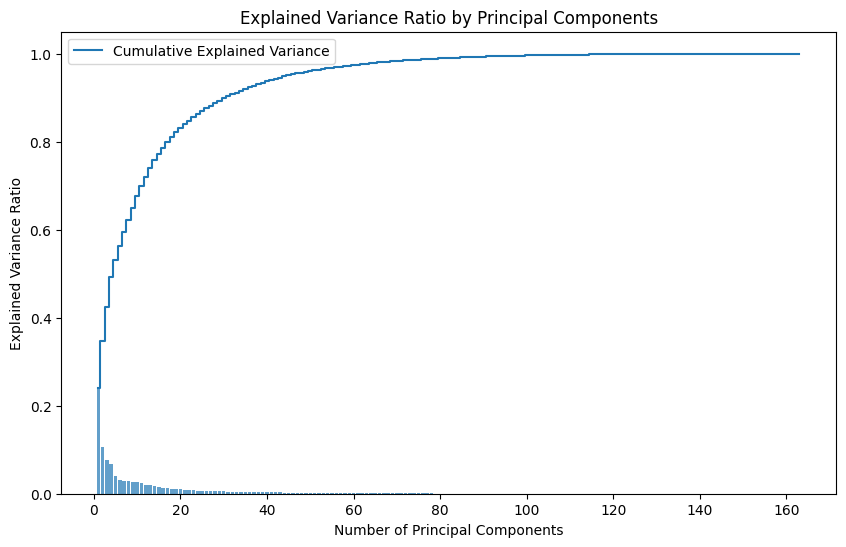

In [21]:
# Principal Component Analysis
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained and cummulative variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()
plt.show()

Using 100 components that explain 98% of the variance strikes a balance between reducing dimensionality and retaining most of the relevant information. This approach can potentially improve the efficiency of subsequent analysis, visualization, and modeling while minimizing the risk of information loss.

In [22]:
n_components = 100
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

### Model Building with Data Validation

In [23]:
# Using cross validation with 5 folds to ensure the model is not overfitting on the data.
model = LinearRegression()
k_fold = 5
scores = cross_val_score(model, X_reduced, y, cv=k_fold, scoring='neg_mean_squared_error')

# The cross_val_score function returns negative mean squared errors,
# so we need to convert them to positive values
positive_scores = -scores

# Calculate the mean and standard deviation of the scores
mean_score = positive_scores.mean()
std_score = positive_scores.std()

print(f"Mean RMSE: {mean_score}")
print(f"Standard Deviation RMSE: {std_score}")

Mean RMSE: 671815944.5739757
Standard Deviation RMSE: 214228275.06478032


### Data Visualization

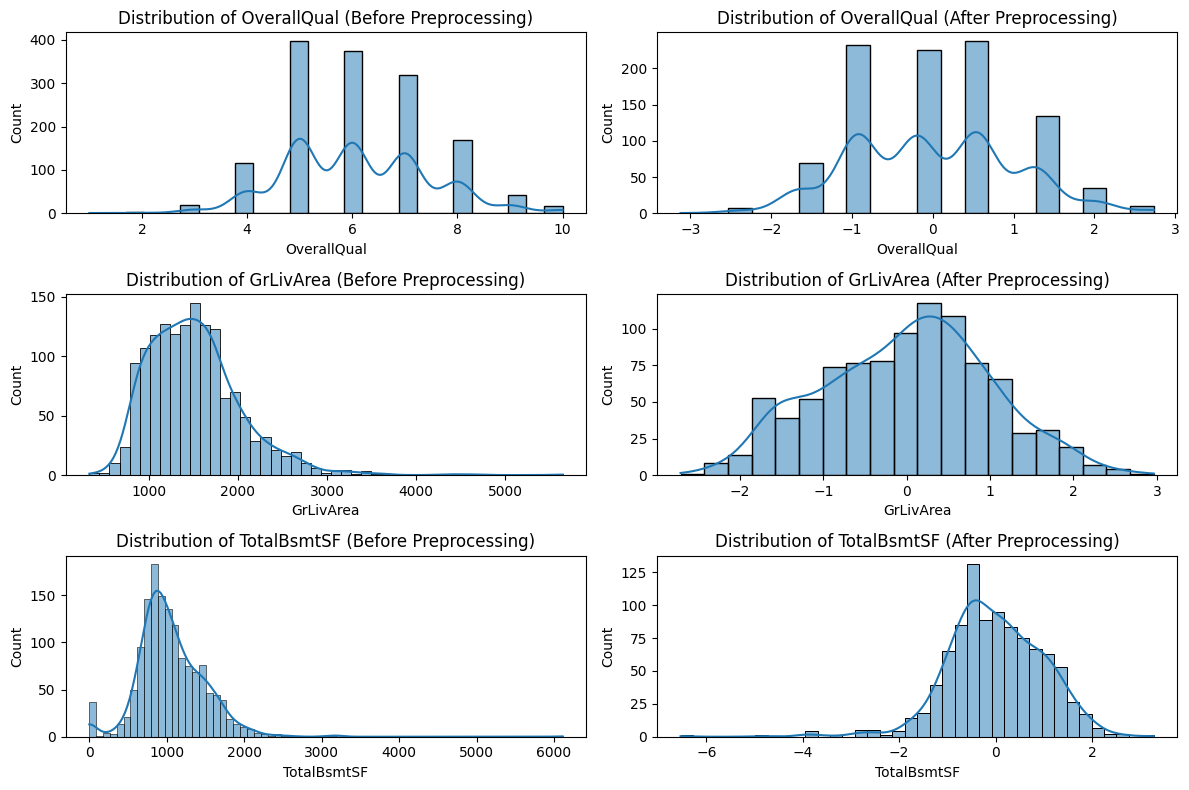

In [24]:
features_to_visualize = ['OverallQual', 'GrLivArea', 'TotalBsmtSF']
fig, axes = plt.subplots(nrows=len(features_to_visualize), ncols=2, figsize=(12, 8))

# Plot distribution before preprocessing
for i, feature in enumerate(features_to_visualize):
    sns.histplot(data=train_data, x=feature, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {feature} (Before Preprocessing)')
    
# Plot distribution after preprocessing
for i, feature in enumerate(features_to_visualize):
    sns.histplot(data=X, x=feature, ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Distribution of {feature} (After Preprocessing)')
    
# Adjust layout
plt.tight_layout()
plt.show()

### Next Steps

* Feature Selection: Analyze the importance of features in the model and consider using techniques like Recursive Feature Elimination (RFE) or feature importance scores from models like Random Forest to select the most important features.
* Cross-Validation Strategies: Experiment with different cross-validation strategies, such as stratified sampling, time series cross-validation, or K-fold cross-validation, to ensure robust model evaluation.
* Advanced Visualization: Create advanced visualizations, such as pair plots, correlation heatmaps, and residual plots, to gain deeper insights into the relationships and patterns within the data.